### Step 1 - Importing Libraries and reading.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro, f_oneway, ttest_ind
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)#displays maximum of 100 columns instead of truncating them

In [3]:
df = pd.read_excel("/Users/mr.questionbank/Desktop/Python-Course-Work/DataFiles/student_performance_data.xlsx")

------
----

### Step 2 - Understanding the Data

In [4]:
df.head()

,StudentID,Name,Gender,Age,Attendance(%),ProjectsCompleted,ProjectsAssigned,ProjectCompletionRate,FinalScore,Grade,Assignment_Week1,Assignment_Week2,Assignment_Week3,Assignment_Week4,Assignment_Week5,Assignment_Week6,Assignment_Week7,Assignment_Week8,WrittenExam_Week1,WrittenExam_Week2,WrittenExam_Week3,WrittenExam_Week4,WrittenExam_Week5,WrittenExam_Week6,WrittenExam_Week7,WrittenExam_Week8
0,S01,Student_1,Male,21,73,1,3,0.33,56.0,C,4,5,10,4,8,4,10,8,42,32,18,23,20,28,34,35
1,S02,Student_2,Female,19,90,0,3,0.00,58.0,C,7,5,4,6,10,4,5,7,39,32,49,43,46,42,38,50
2,S03,Student_3,Male,23,78,0,3,0.00,48.0,D,9,7,4,8,6,4,6,5,37,16,31,40,44,19,26,24
3,S04,Student_4,Male,22,75,0,3,0.00,62.0,C,5,5,7,10,8,6,4,9,45,49,42,49,49,44,49,23
4,S05,Student_5,Male,21,64,1,3,0.33,67.0,C,5,5,10,9,7,9,8,9,44,30,44,39,30,19,47,38


In [5]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'Age', 'Attendance(%)',
       'ProjectsCompleted', 'ProjectsAssigned', 'ProjectCompletionRate',
       'FinalScore', 'Grade', 'Assignment_Week1', 'Assignment_Week2',
       'Assignment_Week3', 'Assignment_Week4', 'Assignment_Week5',
       'Assignment_Week6', 'Assignment_Week7', 'Assignment_Week8',
       'WrittenExam_Week1', 'WrittenExam_Week2', 'WrittenExam_Week3',
       'WrittenExam_Week4', 'WrittenExam_Week5', 'WrittenExam_Week6',
       'WrittenExam_Week7', 'WrittenExam_Week8'],
      dtype='object')

In [6]:
df.dtypes # shows the datatype of each column.

StudentID                 object
Name                      object
Gender                    object
Age                        int64
Attendance(%)              int64
ProjectsCompleted          int64
ProjectsAssigned           int64
ProjectCompletionRate    float64
FinalScore               float64
Grade                     object
Assignment_Week1           int64
Assignment_Week2           int64
Assignment_Week3           int64
Assignment_Week4           int64
Assignment_Week5           int64
Assignment_Week6           int64
Assignment_Week7           int64
Assignment_Week8           int64
WrittenExam_Week1          int64
WrittenExam_Week2          int64
WrittenExam_Week3          int64
WrittenExam_Week4          int64
WrittenExam_Week5          int64
WrittenExam_Week6          int64
WrittenExam_Week7          int64
WrittenExam_Week8          int64
dtype: object

In [7]:
df.describe()

,Age,Attendance(%),ProjectsCompleted,ProjectsAssigned,ProjectCompletionRate,FinalScore,Assignment_Week1,Assignment_Week2,Assignment_Week3,Assignment_Week4,Assignment_Week5,Assignment_Week6,Assignment_Week7,Assignment_Week8,WrittenExam_Week1,WrittenExam_Week2,WrittenExam_Week3,WrittenExam_Week4,WrittenExam_Week5,WrittenExam_Week6,WrittenExam_Week7,WrittenExam_Week8
count,32.000000,32.00000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,21.187500,80.21875,1.437500,3.0,0.479375,65.156250,7.093750,7.062500,6.656250,7.593750,7.406250,6.406250,6.687500,6.718750,35.2500,34.906250,36.906250,32.56250,33.218750,33.906250,34.281250,36.250000
std,2.007044,11.15502,1.134147,0.0,0.378826,8.926616,1.956946,2.093577,2.149409,2.182916,1.738731,2.092373,2.191442,1.904737,10.9956,10.705318,10.825178,10.40452,10.496495,11.289045,11.362742,9.252724
min,18.000000,64.00000,0.000000,3.0,0.000000,48.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.0000,16.000000,16.000000,15.00000,15.000000,15.000000,15.000000,21.000000
25%,20.000000,71.00000,0.000000,3.0,0.000000,58.000000,5.000000,5.000000,5.000000,6.000000,6.000000,4.000000,5.000000,5.750000,25.7500,27.500000,31.750000,22.75000,26.000000,24.000000,24.750000,27.000000
50%,21.000000,77.50000,1.500000,3.0,0.500000,65.500000,7.000000,7.000000,6.000000,8.000000,7.000000,6.000000,6.000000,6.500000,38.0000,35.000000,39.500000,35.00000,34.500000,36.000000,37.500000,36.500000
75%,23.000000,90.00000,2.000000,3.0,0.670000,70.500000,9.000000,9.000000,8.250000,10.000000,9.000000,8.250000,9.000000,8.000000,44.2500,44.750000,45.250000,39.25000,42.250000,44.000000,43.500000,44.500000
max,24.000000,99.00000,3.000000,3.0,1.000000,82.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,50.0000,50.000000,49.000000,50.00000,49.000000,50.000000,50.000000,50.000000


In [8]:
df.shape #This dataset has 32 rows and 26 columns. 

(32, 26)

In [9]:
df.info() # There are no null-values here. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudentID              32 non-null     object 
 1   Name                   32 non-null     object 
 2   Gender                 32 non-null     object 
 3   Age                    32 non-null     int64  
 4   Attendance(%)          32 non-null     int64  
 5   ProjectsCompleted      32 non-null     int64  
 6   ProjectsAssigned       32 non-null     int64  
 7   ProjectCompletionRate  32 non-null     float64
 8   FinalScore             32 non-null     float64
 9   Grade                  32 non-null     object 
 10  Assignment_Week1       32 non-null     int64  
 11  Assignment_Week2       32 non-null     int64  
 12  Assignment_Week3       32 non-null     int64  
 13  Assignment_Week4       32 non-null     int64  
 14  Assignment_Week5       32 non-null     int64  
 15  Assignme

-----
----

### Data Preparation and Transformation 

Here we are preparing the dataset so that we can visualize and analyze the class performance weekwise and in total.

In [10]:
#Creating a list of columns 
Assignment_Columns = [col for col in df.columns if "Assignment" in col]
Writtenexam_Columns = [col for col in df.columns if "WrittenExam" in col]

In [11]:
df['Assignment_Total'] = df[Assignment_Columns].sum(axis = 1)
df['WrittenExam_Total'] = df[Writtenexam_Columns].sum(axis = 1)
df['Total_Marks'] = df['Assignment_Total'] + df['WrittenExam_Total']
df['Average_Marks'] = df['Total_Marks']/(len(Assignment_Columns)+len(Writtenexam_Columns))
df['Average_Percentage'] = (df['Total_Marks']/480)*100

In [12]:
df[['Name', 'Assignment_Total', 'WrittenExam_Total', 'Total_Marks', 'Average_Marks','Average_Percentage']].head()


,Name,Assignment_Total,WrittenExam_Total,Total_Marks,Average_Marks,Average_Percentage
0,Student_1,53,232,285,17.8125,59.375000
1,Student_2,48,339,387,24.1875,80.625000
2,Student_3,49,237,286,17.8750,59.583333
3,Student_4,54,350,404,25.2500,84.166667
4,Student_5,62,291,353,22.0625,73.541667


Here, 

Each `Assignment` is evaluated out of 10. => 10 x 8 = `80`

Each `WrittenExam` is evaluated out of 50. => 50 x 8 = `400`

Therefore `Total` evaluated out of `480`

-------
----

###  Step 3 - Descriptive Data Analysis

#### Overall Class Stats : 
Mean, Median, Standard Deviations, min/manx and range. 

In [13]:
# Central Tendencies : 
Overall_mean = df['Total_Marks'].mean()
Overall_median = df['Total_Marks'].median()

# Measures of spread 
Overall_stddev = df['Total_Marks'].std()
Overall_variance = df['Total_Marks'].var()
Overall_range = df['Total_Marks'].max() - df['Total_Marks'].min()

In [14]:
print("Total Marks = 480")
print("Central Tendencies :")
print("Mean Marks:", Overall_mean)
print("Median Marks:", Overall_median)
print()
print("Measures of spread :")
print("Standard Deviation:", Overall_stddev)
print("Variance:", Overall_variance)
print("Range:", Overall_range)

Total Marks = 480
Central Tendencies :
Mean Marks: 332.90625
Median Marks: 326.0

Measures of spread :
Standard Deviation: 32.420980239305216
Variance: 1051.1199596774193
Range: 131


----

#### Weekly Analysis (stats) : 

In [15]:
weekly_assign_avg = df[Assignment_Columns].mean()
weekly_exam_avg = df[Writtenexam_Columns].mean()
print(f"\n Weekly assignment trends : {weekly_assign_avg} out of 10")
print(f"\n Weekly written exam trends : {weekly_exam_avg} out of 50")


 Weekly assignment trends : Assignment_Week1    7.09375
Assignment_Week2    7.06250
Assignment_Week3    6.65625
Assignment_Week4    7.59375
Assignment_Week5    7.40625
Assignment_Week6    6.40625
Assignment_Week7    6.68750
Assignment_Week8    6.71875
dtype: float64 out of 10

 Weekly written exam trends : WrittenExam_Week1    35.25000
WrittenExam_Week2    34.90625
WrittenExam_Week3    36.90625
WrittenExam_Week4    32.56250
WrittenExam_Week5    33.21875
WrittenExam_Week6    33.90625
WrittenExam_Week7    34.28125
WrittenExam_Week8    36.25000
dtype: float64 out of 50


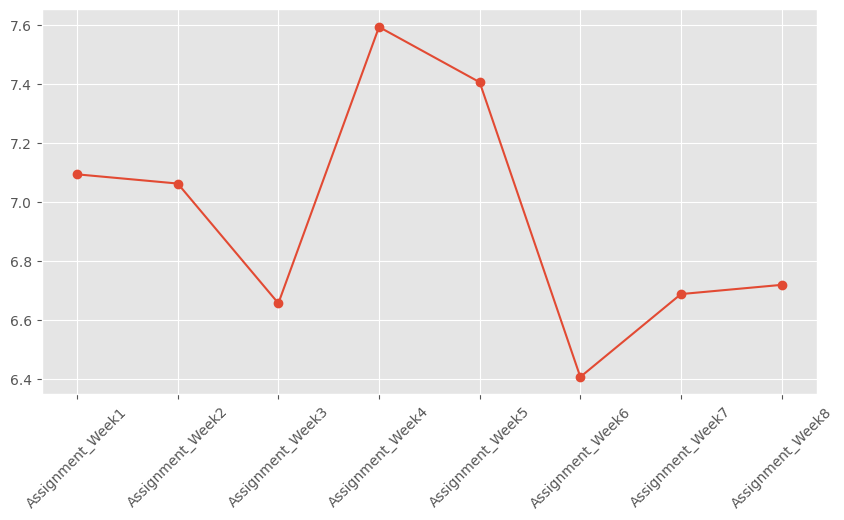

In [16]:
# Assignment Trends : 
plt.figure(figsize =(10,5))
plt.plot(weekly_assign_avg.index, weekly_assign_avg.values, marker = 'o', label = 'Assignment Trends')
plt.xticks(rotation = 45)
plt.show()

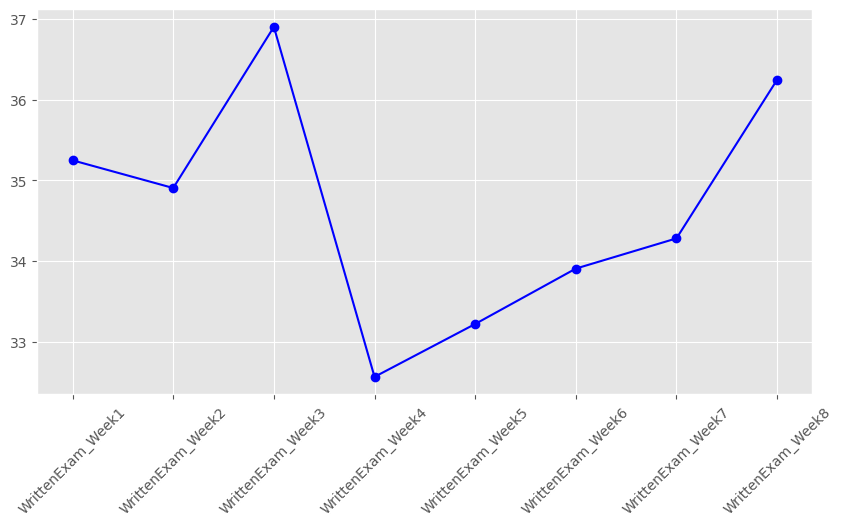

In [17]:
# Exam Trends : 
plt.figure(figsize = (10,5))
plt.plot(weekly_exam_avg.index, weekly_exam_avg.values, marker = 'o', label = 'Exam Trends', color = 'blue')
plt.xticks(rotation = 45)
plt.show()

------
----

### Step 4 - Marks Distribution and Question paper difficulty analysis

- Understanding marks distribution for each week and overall.
- Skewness - Tells us if the question paper set was too difficult or too easy. 
- Kurtosis - Tells us if the marks are clustered/ spread out. 

#### Overall : 

##### Combined marks : 

In [18]:
# skewness and kurtosis of total marks. 
Overall_skew = skew(df['Total_Marks'])
Overall_kurt = kurtosis(df['Total_Marks'])

print(f"Overall skewness of marks : {Overall_skew}")
print(f"Overall kurtosis of marks : {Overall_kurt}")

Overall skewness of marks : 0.2942086760294644
Overall kurtosis of marks : -0.6395258113852762


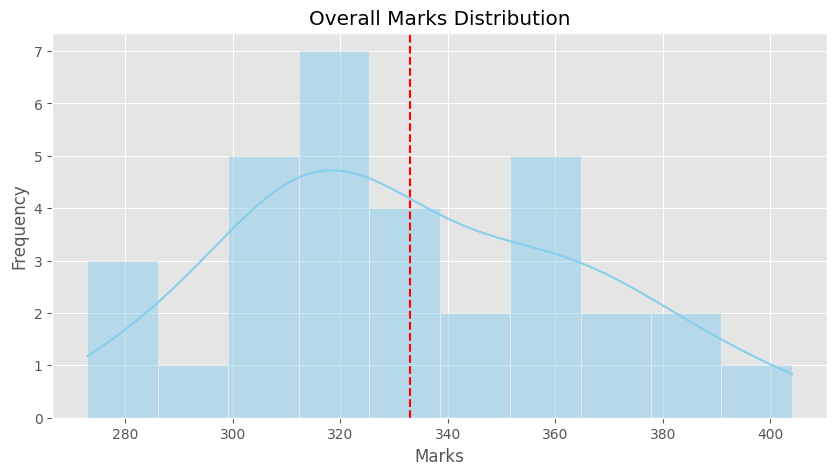

In [19]:
# Histogram showing the overall marks distribution
plt.figure(figsize =(10,5))
sns.histplot(df['Total_Marks'], kde =True, color= 'skyblue', bins = 10)
plt.axvline(Overall_mean, color ="red", linestyle = "--", label = f"Mean = {Overall_mean:.2f}")
plt.title("Overall Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()

* Here the students overall the students have scored less than mean, although the kurtosis indicates that the curve is spread.

##### Assignments : 

In [20]:
Overall_Assignments_skewness = skew(df['Assignment_Total'])
Overall_Assignments_kurtosis = kurtosis(df['Assignment_Total'])
Overall_Assignments_mean = df['Assignment_Total'].mean()

print(f"Overall skewness of Assignment marks : {Overall_Assignments_skewness}")
print(f"Overall kurtosis of Assignment marks : {Overall_Assignments_kurtosis}")
print(f"Overall mean of Assignment marks (out of 80): {Overall_Assignments_mean}")

Overall skewness of Assignment marks : -0.0757803956793268
Overall kurtosis of Assignment marks : -0.8593783420426835
Overall mean of Assignment marks (out of 80): 55.625


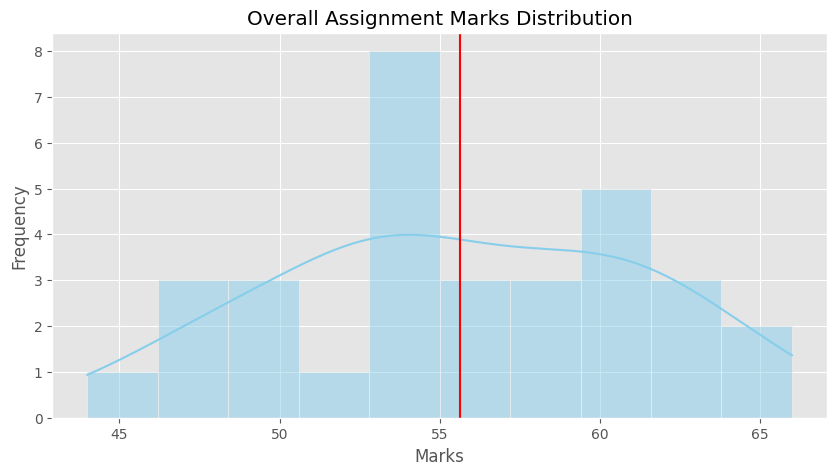

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['Assignment_Total'], kde = True, color = 'skyblue', bins= 10)
plt.axvline(Overall_Assignments_mean,label = f"Mean = {Overall_Assignments_mean:.2f}", color = "red")
plt.title("Overall Assignment Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()
        

##### Written Exams :

In [22]:
Overall_exam_skewness = skew(df['WrittenExam_Total'])
Overall_exam_kurtosis = kurtosis(df['WrittenExam_Total'])
Overall_exam_mean = df['WrittenExam_Total'].mean()

print(f"Overall skewness of exam marks : {Overall_exam_skewness}")
print(f"Overall kurtosis of exam marks : {Overall_exam_kurtosis}")
print(f"Overall mean of exam marks : {Overall_exam_mean}")

Overall skewness of exam marks : 0.37461940634093893
Overall kurtosis of exam marks : -0.38754994885292593
Overall mean of exam marks : 277.28125


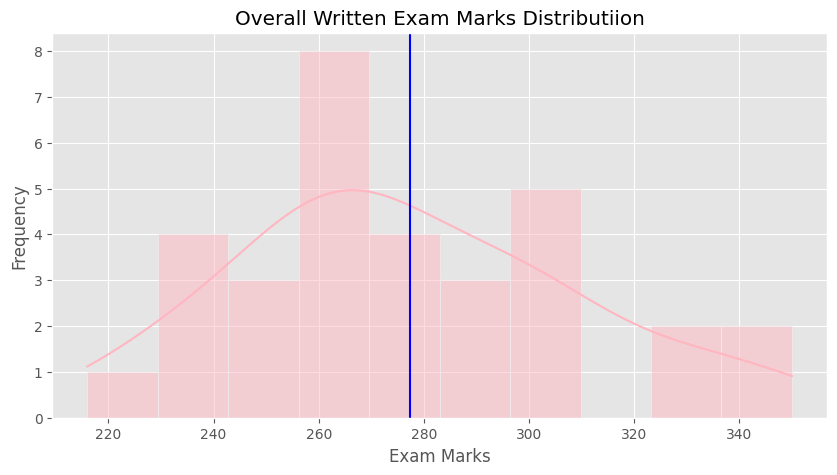

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df["WrittenExam_Total"],kde = True, color = "lightpink", bins =10)
plt.axvline(Overall_exam_mean,label = f"Mean = {Overall_exam_mean:.2f}", color = "blue")
plt.title("Overall Written Exam Marks Distributiion")
plt.xlabel("Exam Marks")
plt.ylabel("Frequency")
plt.show()

---
#### Weekly Analysis : 

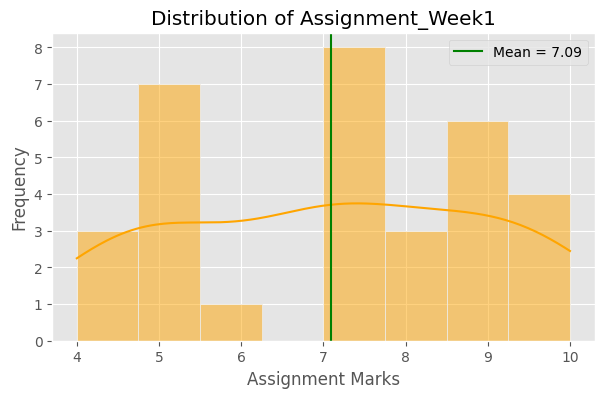

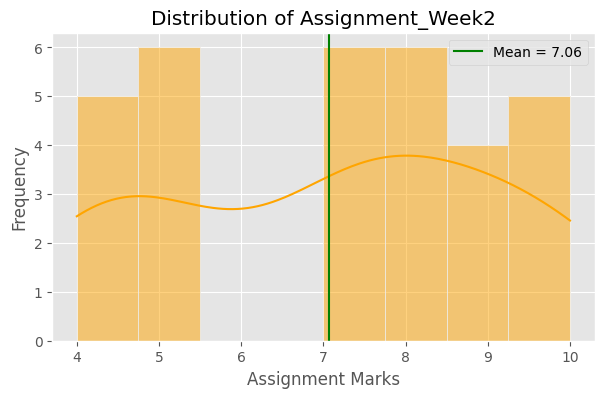

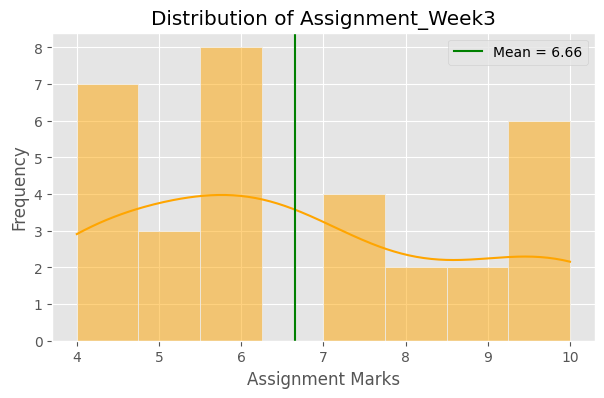

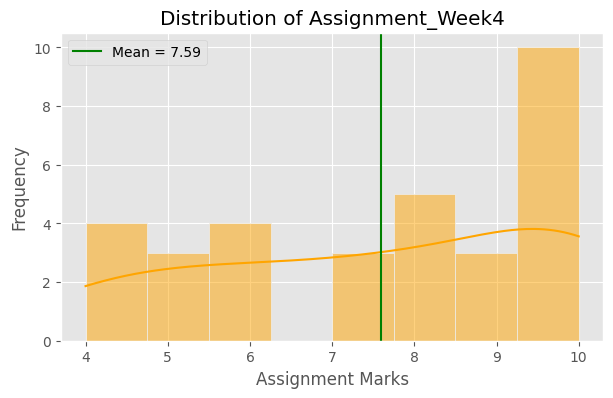

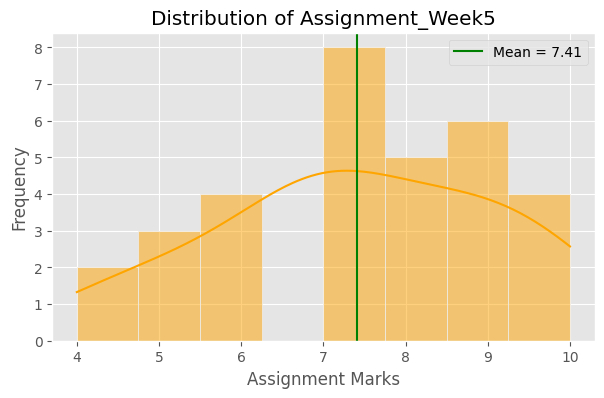

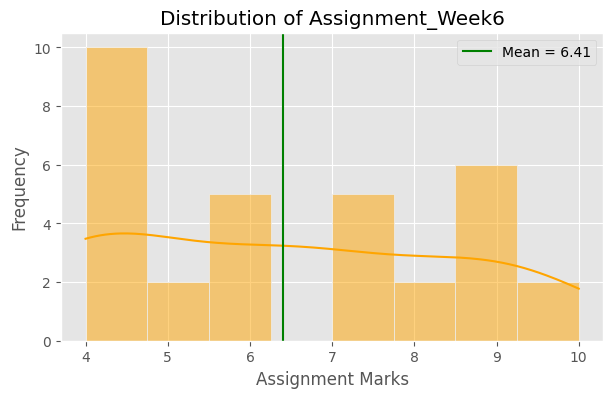

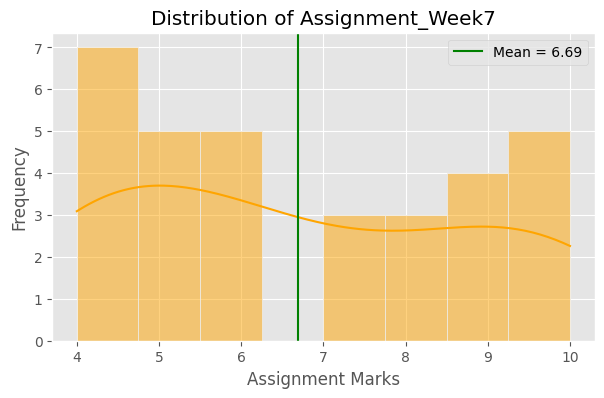

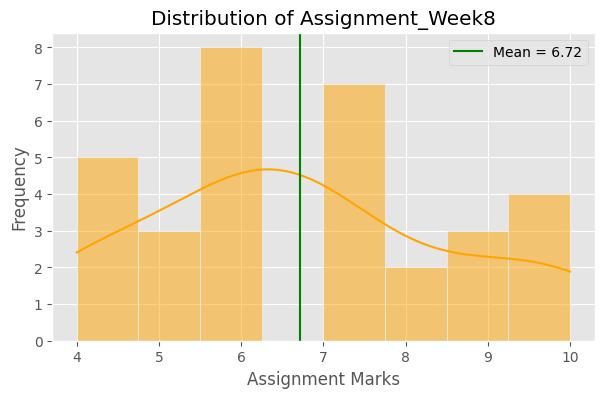

In [24]:
# Weekly distribution of assignment marks 
for col in Assignment_Columns: 
    mean_col = df[col].mean()
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde = True, bins = 8, color = "orange")
    plt.axvline(mean_col,color = "green", label=f"Mean = {mean_col:.2f}")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Assignment Marks")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

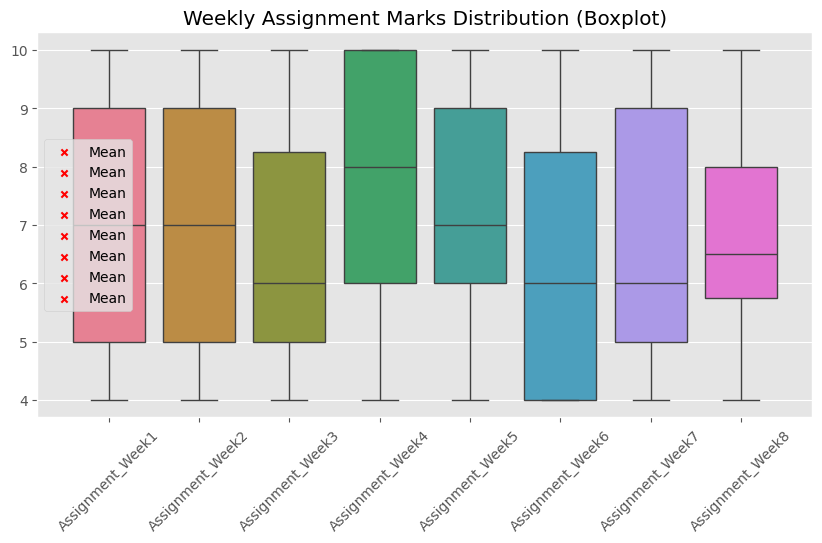

In [25]:
# Boxplots showing Assignment marks over the weeks. 
plt.figure(figsize=(10,5))
sns.boxplot(data=df[Assignment_Columns])
for i,col in enumerate(Assignment_Columns): 
    mean_val = df[col].mean()
    plt.scatter(i, mean_val, color='red', marker='x', s=20, label="Mean")
plt.title("Weekly Assignment Marks Distribution (Boxplot)")
plt.xticks(rotation = 45)
plt.legend()
plt.show()
# Needs work - the `mean` legend needs to be shown on each boxplot.

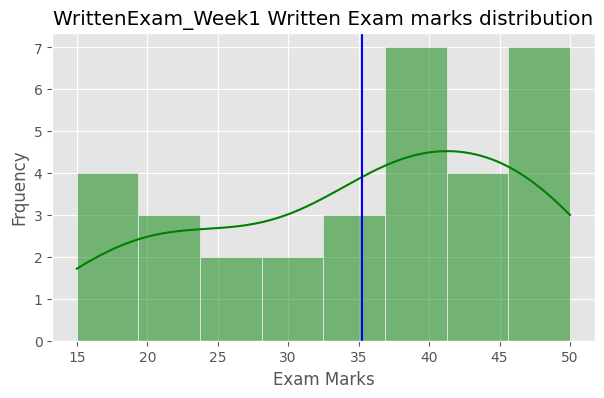

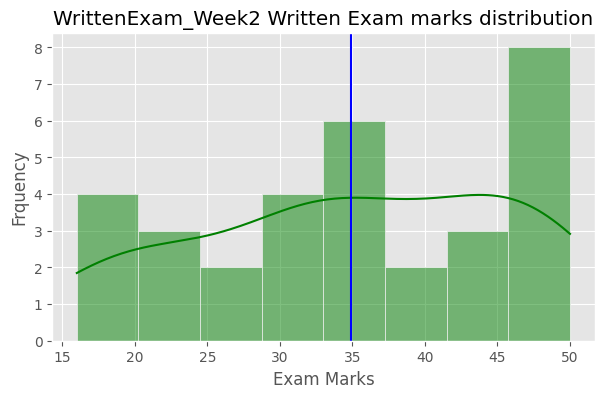

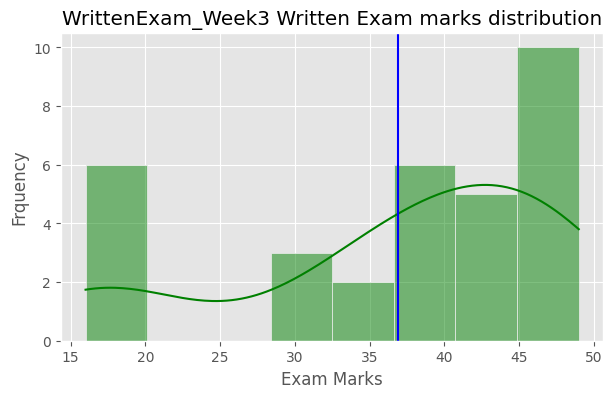

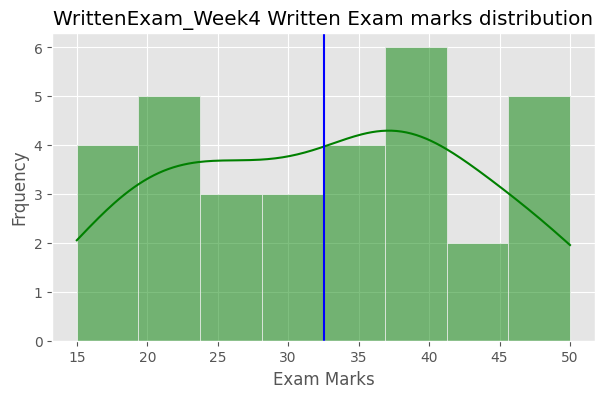

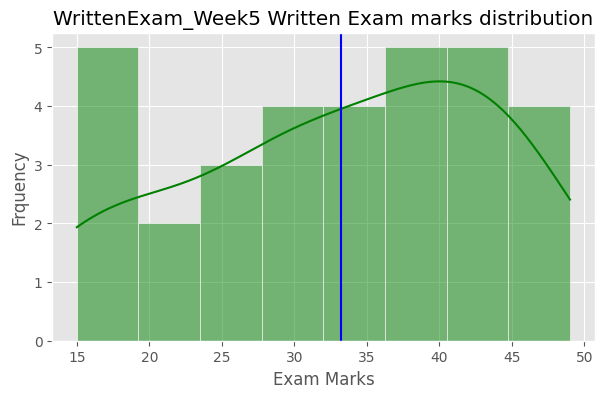

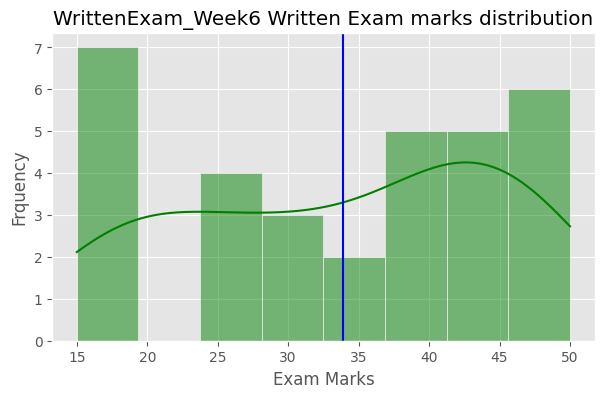

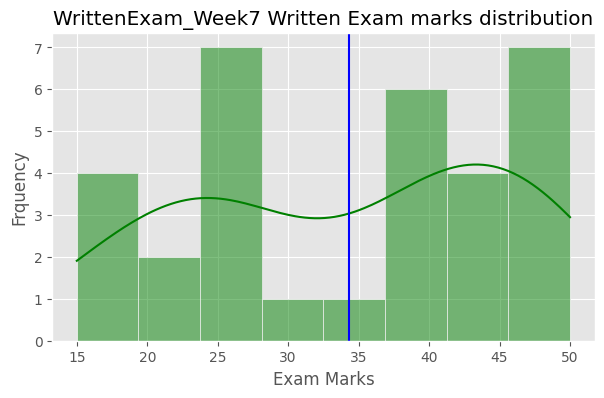

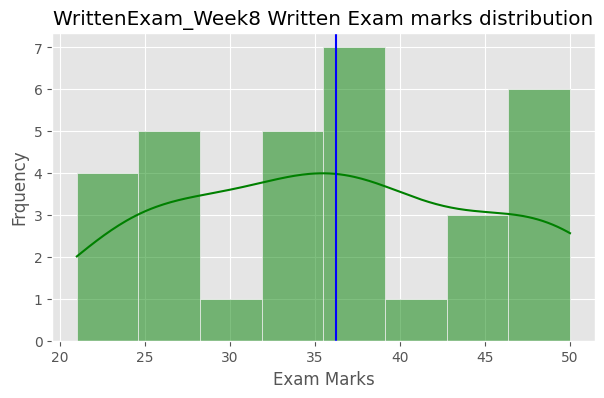

In [26]:
# weekly Distribution of exam marks 
for col in Writtenexam_Columns: 
    mean_col = df[col].mean()
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde= True, color = "green", bins = 8)
    plt.axvline(mean_col,color ="blue",  label=f"Mean = {mean_col:.2f}")
    plt.title(f"{col} Written Exam marks distribution")
    plt.xlabel('Exam Marks')
    plt.ylabel("Frquency")
    plt.show()

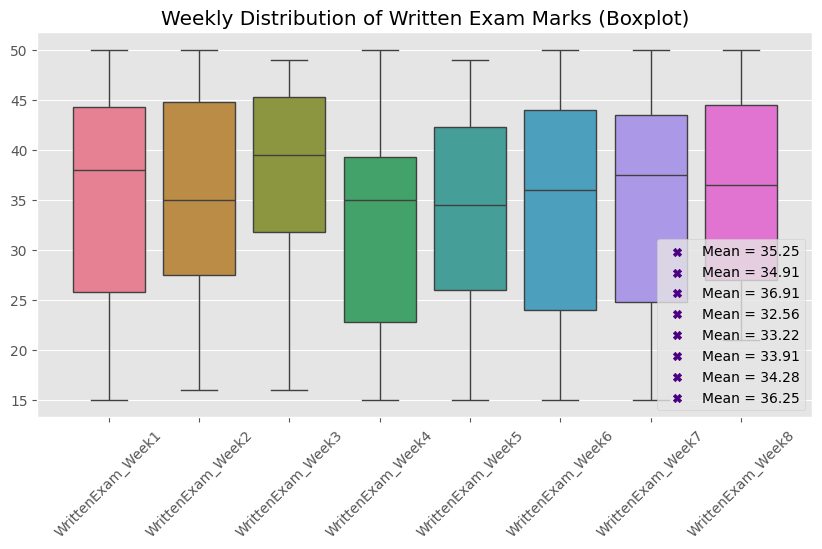

In [27]:
# Weekly distribution of written exam marks.
plt.figure(figsize = (10,5))
sns.boxplot(data = df[Writtenexam_Columns])
for i,col in enumerate(Writtenexam_Columns):
    mean_val = df[col].mean()
    plt.scatter(i,mean_val, color = "indigo", marker = "X", label = f"Mean = {mean_val:.2f}")
plt.title("Weekly Distribution of Written Exam Marks (Boxplot)")
plt.legend()
plt.xticks(rotation =45)
plt.show()

-----
-----

### Step 4 - Normality and Distribution Checks. (Statistical Tests)

In the previous step, we were just eyeballing the distribution. Now, formally inspect the normality of distribution (which will tell us about the overall distribution of marks.), we now proceed with - 

- Shapiro Test 
- hIstograms 
- Popular Intervals (To check for remedial and toppers.)

In [28]:
df.head()

,StudentID,Name,Gender,Age,Attendance(%),ProjectsCompleted,ProjectsAssigned,ProjectCompletionRate,FinalScore,Grade,Assignment_Week1,Assignment_Week2,Assignment_Week3,Assignment_Week4,Assignment_Week5,Assignment_Week6,Assignment_Week7,Assignment_Week8,WrittenExam_Week1,WrittenExam_Week2,WrittenExam_Week3,WrittenExam_Week4,WrittenExam_Week5,WrittenExam_Week6,WrittenExam_Week7,WrittenExam_Week8,Assignment_Total,WrittenExam_Total,Total_Marks,Average_Marks,Average_Percentage
0,S01,Student_1,Male,21,73,1,3,0.33,56.0,C,4,5,10,4,8,4,10,8,42,32,18,23,20,28,34,35,53,232,285,17.8125,59.375000
1,S02,Student_2,Female,19,90,0,3,0.00,58.0,C,7,5,4,6,10,4,5,7,39,32,49,43,46,42,38,50,48,339,387,24.1875,80.625000
2,S03,Student_3,Male,23,78,0,3,0.00,48.0,D,9,7,4,8,6,4,6,5,37,16,31,40,44,19,26,24,49,237,286,17.8750,59.583333
3,S04,Student_4,Male,22,75,0,3,0.00,62.0,C,5,5,7,10,8,6,4,9,45,49,42,49,49,44,49,23,54,350,404,25.2500,84.166667
4,S05,Student_5,Male,21,64,1,3,0.33,67.0,C,5,5,10,9,7,9,8,9,44,30,44,39,30,19,47,38,62,291,353,22.0625,73.541667


#### Shapiro- Wilk Test :
To Check for normality of distribution of marks.

In [29]:
stat,p = shapiro(df['Total_Marks'])

print("Shapiro-Wilk Test (Overall Marks)")
print(f"Statistic = {stat:.3f}, p-value = {p:.3f}")

if p>0.05: 
    print("Data is Normally Distributed")
else: 
    print("Data is not normally distributed.")

Shapiro-Wilk Test (Overall Marks)
Statistic = 0.976, p-value = 0.671
Data is Normally Distributed


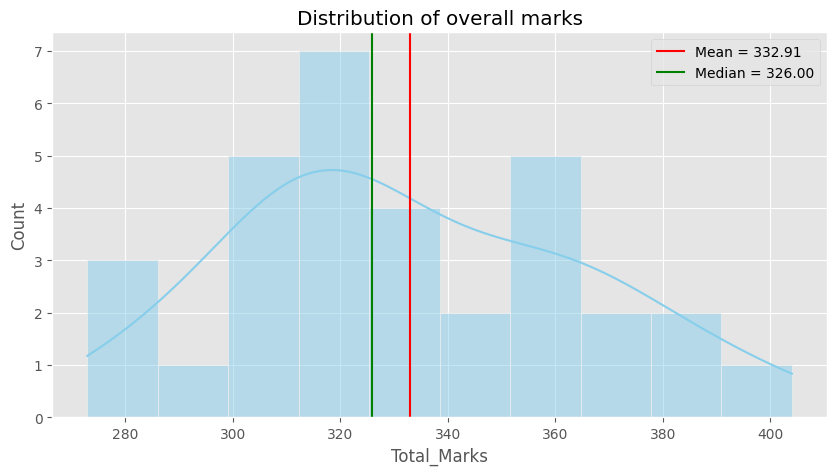

In [30]:
# Histogram
plt.figure(figsize = (10,5))
sns.histplot(df["Total_Marks"], kde = True, bins = 10, color = "skyblue")
plt.axvline(df["Total_Marks"].mean(), label = f"Mean = {df['Total_Marks'].mean():.2f}",color ="red")
plt.axvline(df["Total_Marks"].median(), label = f"Median = {df['Total_Marks'].median():.2f}", color = "green")
plt.title("Distribution of overall marks")
plt.legend()
plt.show()

In [31]:
#Popular Intervals : 
counts, bins = np.histogram(df["Total_Marks"], bins = 10)
max_bins_index  = counts.argmax()
popular_interval = (int(bins[max_bins_index]), int(bins[max_bins_index+1]))
percentage_popular_interval = (int(bins[max_bins_index])*100/480, int(bins[max_bins_index+1])*100/480)

print(f"Most of the students scored in the range : {popular_interval}")
print(f"Most of the students scored in the percentage range : {percentage_popular_interval}")


Most of the students scored in the range : (312, 325)
Most of the students scored in the percentage range : (65.0, 67.70833333333333)


#### ANOVA Test : 
To see if there is any significant improvement in the performance wekkly. 

In [32]:
assignment_anova_result = f_oneway(* [df[col] for col in Assignment_Columns])
exam_anova_result = f_oneway(*[df[col] for col in Writtenexam_Columns])
print(f"ANOVA test result (Assignments): F = {assignment_anova_result.statistic:.2f}, p = {assignment_anova_result.pvalue:.3f}")
if assignment_anova_result.pvalue < 0.05: 
    print("There is a significant difference in assignment marks every week.")
else: 
    print("The assignment marks have remained stable.")
print(f"ANOVA test result (Exams): F = {exam_anova_result.statistic:.2f}, p = {exam_anova_result.pvalue:.3f}")
if assignment_anova_result.pvalue < 0.05: 
    print("There is a significant difference in exam marks every week.")
else: 
    print("The exam marks have remained stable.")

ANOVA test result (Assignments): F = 1.27, p = 0.266
The assignment marks have remained stable.
ANOVA test result (Exams): F = 0.61, p = 0.750
The exam marks have remained stable.


#### Two sample T-test (Assignment vs Exams)
This compares average assignment marks to average test marks. 
This tells us if the exams were statistically harder than the assignments. 

In [33]:
t_stat,p_stat = ttest_ind(df['Assignment_Total'],df['WrittenExam_Total'])
print(f"T Test (Assignment vs Exam) : t = {t_stat:.2f}, p = {p_stat:.2f}")

if p < 0.05: 
    print("Significant difference : Assignments and Exams have different difficulty levels.")
else: 
    print("No Significant difference : Assignments and the Exams had same level of difficulty.")

T Test (Assignment vs Exam) : t = -37.91, p = 0.00
No Significant difference : Assignments and the Exams had same level of difficulty.


-----
-----
### 5. Correlation Analysis via Heatmap

This is done to observe the correlation between marks, assignments, projects, and attendance. Now this is done, to check the relevance of assignments and projects to the students' performance.  

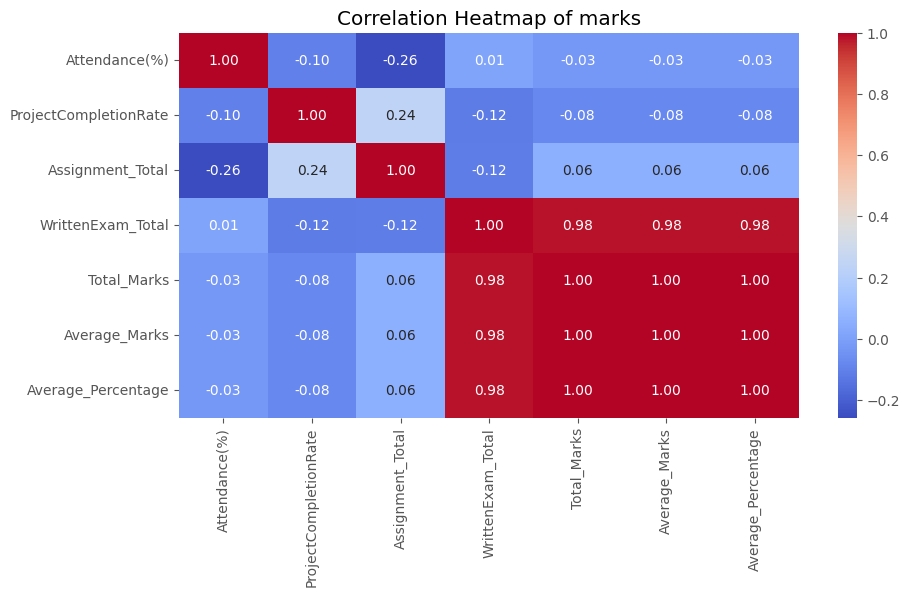

In [34]:
relevant_cols= ['Attendance(%)','ProjectCompletionRate','Assignment_Total',
       'WrittenExam_Total', 'Total_Marks', 'Average_Marks',
       'Average_Percentage']
corr_matrix  = df[relevant_cols].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap of marks")
plt.show()

Assignment_Total vs WrittenExam_Total → correlation is around -0.12 (slightly negative).

👉 This means assignments and exams are not strongly related. Students who do well in assignments are not guaranteed to do well in exams.
WrittenExam_Total vs Total_Marks / Average_Marks / Average_Percentage → correlation ≈ 0.98 to 1.0.

👉 Makes sense — exams dominate the overall marks, so they move almost identically.
Attendance vs Marks → weak negative correlation (-0.03 to -0.26).

👉 Surprising! Attendance is not translating into higher marks. You can highlight this as a “finding” (it makes your report more interesting).
ProjectCompletionRate vs Marks → small positive correlation (~0.24).

👉 Suggests that students who finished projects also did slightly better in assignments/exams.

---------
-----
### 6.Visual Enhancements :

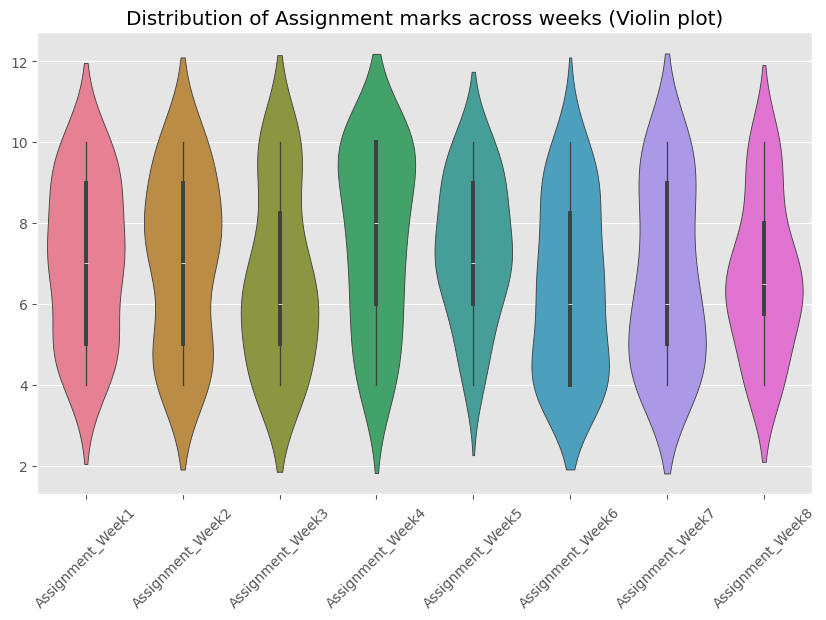

In [36]:
# Violin plot(Assignments and exams distribution)
plt.figure(figsize=(10,6))
sns.violinplot(data = df[Assignment_Columns])
plt.title("Distribution of Assignment marks across weeks (Violin plot)")
plt.xticks(rotation = 45)
plt.show()


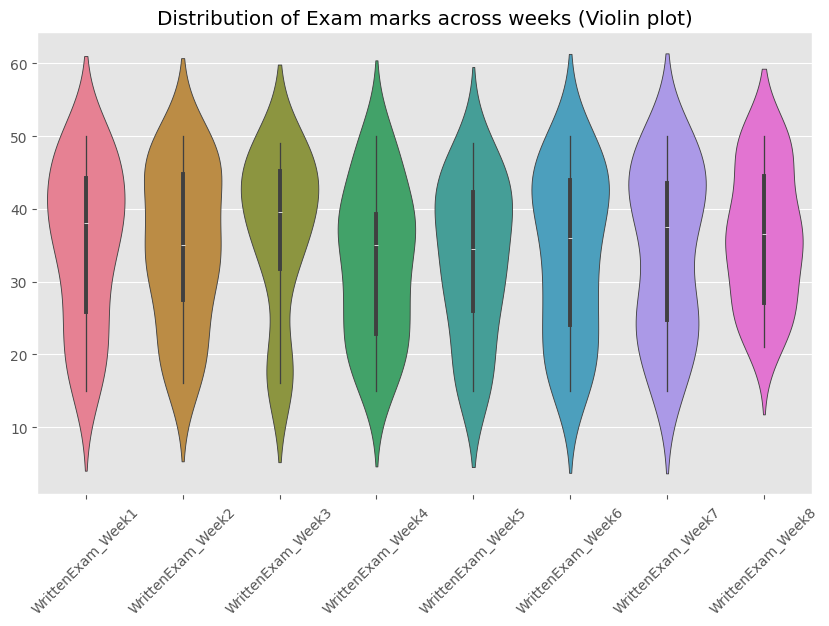

In [38]:
plt.figure(figsize=(10,6))
sns.violinplot(data = df[Writtenexam_Columns])
plt.xticks(rotation = 45 )
plt.title("Distribution of Exam marks across weeks (Violin plot)")
plt.show()

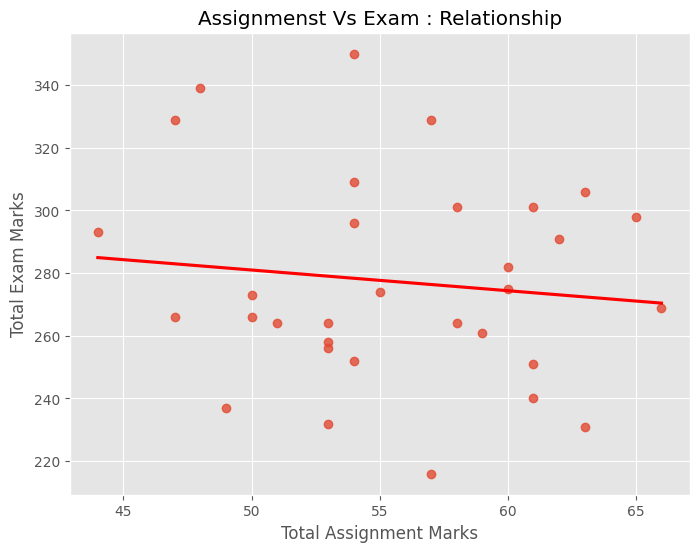

In [40]:
# Scatter plot (Assignments vs Exam)
plt.figure(figsize=(8,6))
sns.regplot(x = df['Assignment_Total'], y = df["WrittenExam_Total"], ci = None, line_kws = {"color":"red"})
plt.title("Assignmenst Vs Exam : Relationship")
plt.xlabel("Total Assignment Marks")
plt.ylabel("Total Exam Marks")
plt.show()

----
----
### 7.Outlier Analysis : 

This is done inorder to spot outliers - Toppers , and remedials.

Outliers are values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

In [49]:
q1 = df["Total_Marks"].quantile(0.25)
q3 = df["Total_Marks"].quantile(0.75)
iqr = q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

outliers = df[(df["Total_Marks"]<lower_limit)|(df["Total_Marks"]>upper_limit)]
print(f"Total number of outliers : {len(outliers)}")

Total number of outliers : 0


In [50]:
outliers[["StudentID", "Total_Marks"]]

,StudentID,Total_Marks


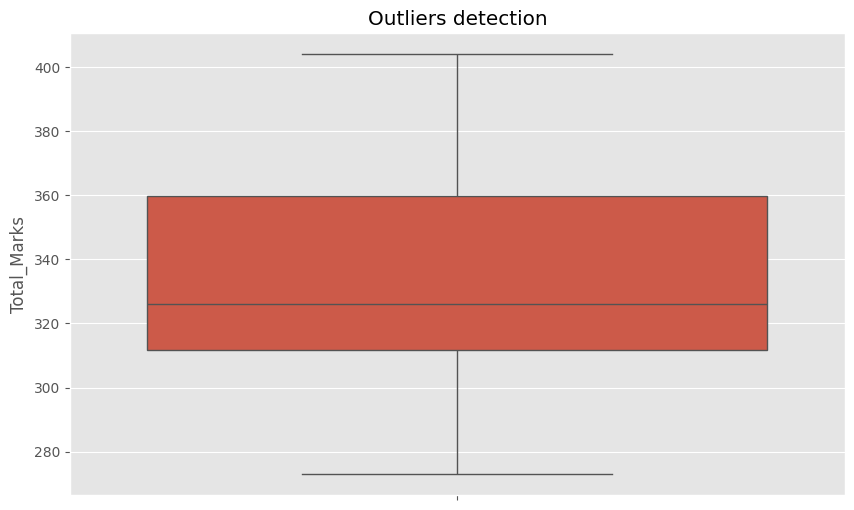

In [57]:
# Visual representation of outliers on a boxplot.
plt.figure(figsize=(10,6))
sns.boxplot(data= df["Total_Marks"],showfliers = True)
plt.title("Outliers detection")
plt.show()

Currently there are no statistical outliers. 

----
----
### 8. Prescriptive Analysis : 
The above steps are for descriptive and diagnostic analysis (what/why it happened). 

Now time for prescriptive analysis - understandign patterns and 
suggesting actions.

#### Mean Progression- is the class performance increasing/ decreasing overtime. 

In [53]:
print(f"Weekly Assignment Marks : {weekly_assign_avg}")
print(f"Weekly Exam Marks : {weekly_exam_avg}")

Weekly Assignment Marks : Assignment_Week1    7.09375
Assignment_Week2    7.06250
Assignment_Week3    6.65625
Assignment_Week4    7.59375
Assignment_Week5    7.40625
Assignment_Week6    6.40625
Assignment_Week7    6.68750
Assignment_Week8    6.71875
dtype: float64
Weekly Exam Marks : WrittenExam_Week1    35.25000
WrittenExam_Week2    34.90625
WrittenExam_Week3    36.90625
WrittenExam_Week4    32.56250
WrittenExam_Week5    33.21875
WrittenExam_Week6    33.90625
WrittenExam_Week7    34.28125
WrittenExam_Week8    36.25000
dtype: float64


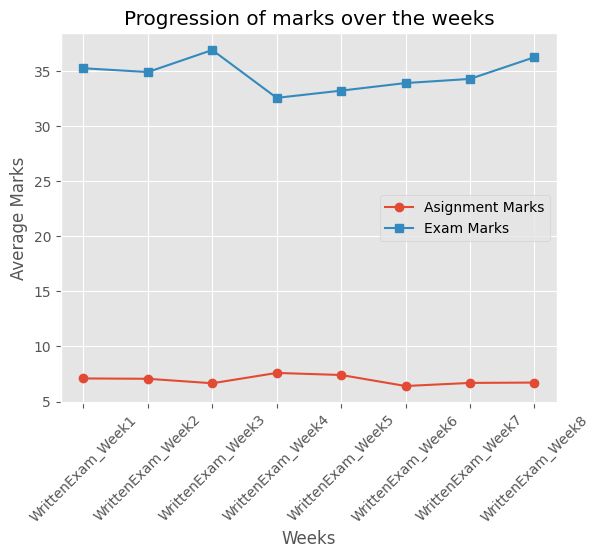

In [ ]:
# PLotting a weekly improvement chart. 
weekly_assign_avg.plot(marker = "o", label = "Asignment Marks")
weekly_exam_avg.plot(marker = "s", label= "Exam Marks")
plt.title("Progression of marks over the weeks")
plt.xlabel("Weeks")
plt.ylabel("Average Marks")
plt.legend()
plt.grid(True)
plt.xticks(rotation =45)
plt.show()

The Overall performance of the class is stable 1.e. not changing much.

#### Variance and Range of marks - are the student performance getting consistent/ scattered. 

In [62]:
assignment_var = df[Assignment_Columns].var()
exam_var = df[Writtenexam_Columns].var()

assignment_range = df[Assignment_Columns].max()-df[Assignment_Columns].min()
exam_range = df[Writtenexam_Columns].max()-df[Writtenexam_Columns].min()

print(f"weekly assignment marks range : {assignment_range}")
print(f"weekly exam marks range : {exam_range}")
print(f"weekly assignment marks variance  : {assignment_var}")
print(f"weekly exam marks range : {exam_var}")

weekly assignment marks range : Assignment_Week1    6
Assignment_Week2    6
Assignment_Week3    6
Assignment_Week4    6
Assignment_Week5    6
Assignment_Week6    6
Assignment_Week7    6
Assignment_Week8    6
dtype: int64
weekly exam marks range : WrittenExam_Week1    35
WrittenExam_Week2    34
WrittenExam_Week3    33
WrittenExam_Week4    35
WrittenExam_Week5    34
WrittenExam_Week6    35
WrittenExam_Week7    35
WrittenExam_Week8    29
dtype: int64
weekly assignment marks variance  : Assignment_Week1    3.829637
Assignment_Week2    4.383065
Assignment_Week3    4.619960
Assignment_Week4    4.765121
Assignment_Week5    3.023185
Assignment_Week6    4.378024
Assignment_Week7    4.802419
Assignment_Week8    3.628024
dtype: float64
weekly exam marks range : WrittenExam_Week1    120.903226
WrittenExam_Week2    114.603831
WrittenExam_Week3    117.184476
WrittenExam_Week4    108.254032
WrittenExam_Week5    110.176411
WrittenExam_Week6    127.442540
WrittenExam_Week7    129.111895
WrittenExam_Wee

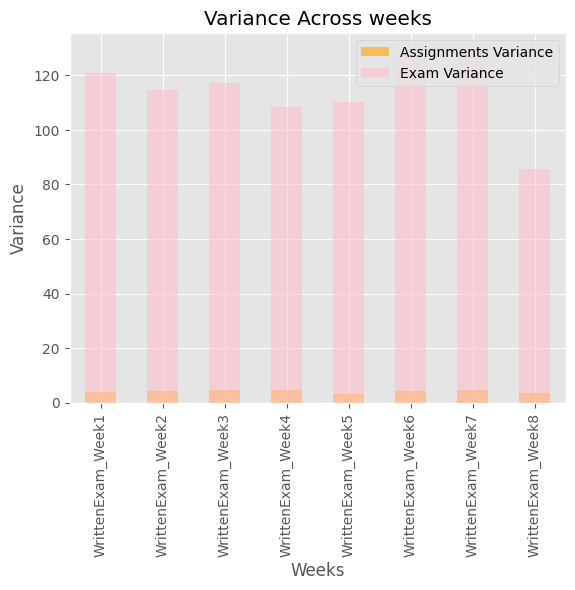

In [64]:
# Plotting the variance of exam and assignment for comparison: 
assignment_var.plot(kind = 'bar', color = 'orange', alpha = 0.6, label = "Assignments Variance")
exam_var.plot(kind = 'bar', color = "pink", alpha = 0.6, label = "Exam Variance" )
plt.title("Variance Across weeks")
plt.ylabel("Variance")
plt.xlabel("Weeks")
plt.legend()
plt.show()

Interpretation for Report

High variance week → question paper was either unusually easy (some scored very high, others very low) or unusually hard.

Range analysis → large gap between top & bottom scorers.

Helps explain paper difficulty consistency.

#### Clustering - Identifying groups of students with similar performance using ML. 

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [85]:
# Features for clustering 
X = df[["Assignment_Total", "WrittenExam_Total"]]

#Standardizing using Standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# Running Kmeans - 3 cluster(Toppers, Average, Remedial)
k_means = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = k_means.fit_predict(X)

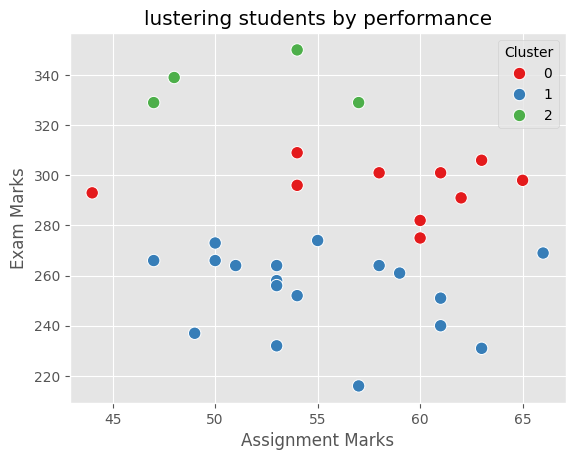

In [87]:
# Visualize Clusters 
sns.scatterplot(data = df, x= df['Assignment_Total'], y = df['WrittenExam_Total'], hue = "Cluster", palette= "Set1",s= 80)
plt.title("lustering students by performance")
plt.xlabel("Assignment Marks")
plt.ylabel("Exam Marks")
plt.legend(title = "Cluster")
plt.show()

In [92]:
#Interpretation
cluster_map = {0: "Average", 1: "Remedial", 2: "Topper"}
df['Cluster_Label'] = df["Cluster"].map(cluster_map)


In [93]:
df[["StudentID", "Assignment_Total", "WrittenExam_Total", "Cluster_Label"]].head()

,StudentID,Assignment_Total,WrittenExam_Total,Cluster_Label
0,S01,53,232,Remedial
1,S02,48,339,Topper
2,S03,49,237,Remedial
3,S04,54,350,Topper
4,S05,62,291,Average
